In [1]:
%load_ext autoreload
%autoreload 2

from Eir import AgeStructuredSIR, AgeStructuredSIRD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use("../style.mplstyle")

In [3]:
days, dt = 31, 0.1

## AgeStructuredSIR

In [4]:
# labels = ["<20", "20-40", "40-60", "60-80", ">80"]
# S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
# I0 = [14, 18, 18, 12, 5]
# R0 = [0, 0, 0, 0, 0]
# beta = [1.8, 1.4, 1.0, 0.6, 0.2]
# gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
# N = np.array(S0) + np.array(I0) + np.array(R0)

# sim = AgeStructuredSIR(labels, beta, gamma, S0, I0, R0)
# df, fig = sim.run(days, dt)
# fig

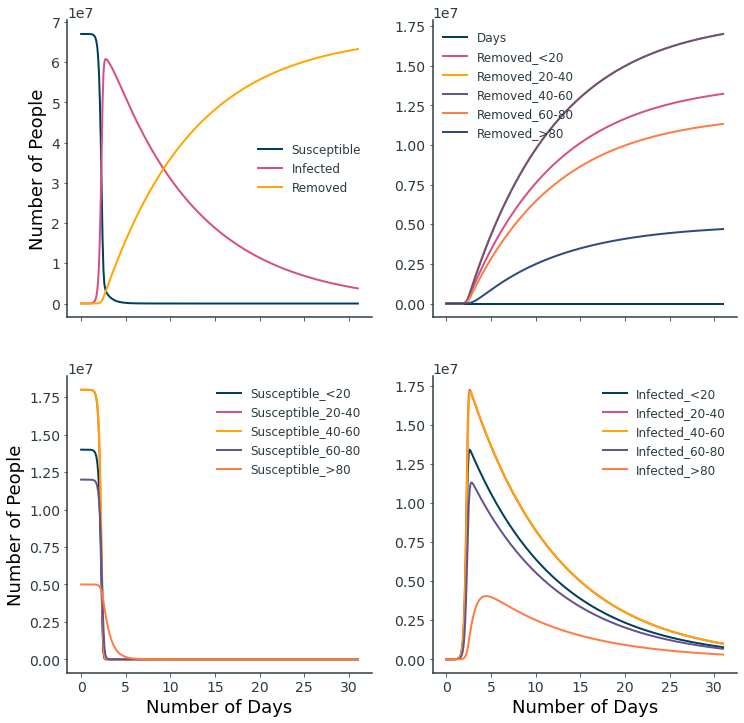

In [5]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
beta = np.array([
    [4,   2.5, 1.6, 1,   0.1],
    [2.5, 3,   2.2, 1.4, 0.2],
    [1.6, 2.2, 2.5, 1.8, 0.3],
    [1,   1.4, 1.8, 2,   0.4],
    [0.1, 0.2, 0.3, 0.4, 0.5]
])
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIR(labels, beta, gamma, S0, I0, R0)
df, fig = sim.run(days, dt)
fig

## AgeStructuredSIRD

In [6]:
# labels = ["<20", "20-40", "40-60", "60-80", ">80"]
# S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
# I0 = [14, 18, 18, 12, 5]
# R0 = [0, 0, 0, 0, 0]
# beta = [1.8, 1.4, 1.0, 0.6, 0.2]
# gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
# omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
# N = np.array(S0) + np.array(I0) + np.array(R0)

# sim = AgeStructuredSIRD(labels, beta, gamma, omega, S0, I0, R0)
# df, fig = sim.run(31, .1)
# fig

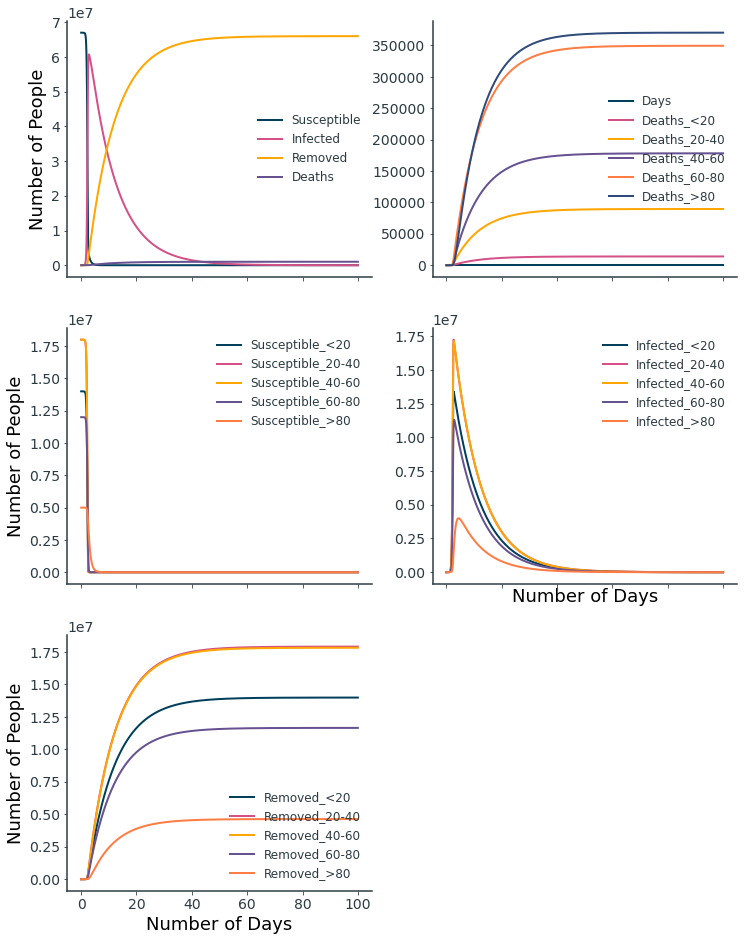

In [7]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
beta = np.array([
    [4,   2.5, 1.6, 1,   0.1],
    [2.5, 3,   2.2, 1.4, 0.2],
    [1.6, 2.2, 2.5, 1.8, 0.3],
    [1,   1.4, 1.8, 2,   0.4],
    [0.1, 0.2, 0.3, 0.4, 0.5]
])
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRD(labels, beta, gamma, omega, S0, I0, R0)
df, fig = sim.run(100, .1)
fig

In [8]:
end_deaths = df.iloc[-1][["Deaths"] + [f"Deaths_{l}" for l in labels]].astype(int)
end_suscep = df.iloc[-1][["Susceptible"] + [f"Susceptible_{l}" for l in labels]].astype(int)
total = np.array([sum(N)] + list(N))
end_infect = total - end_suscep
fatality_rates = pd.Series(end_deaths.values / end_infect.values, index=end_deaths.index)
for g, f, d, i, t in zip(end_deaths.index, fatality_rates, end_deaths, end_infect, total):
    print(f"{g:12}: {f*100:.2f}% fatality rate - {d:7,} deaths - {i:10,}/{t:10,} infected")

Deaths      : 1.49% fatality rate - 1,001,603 deaths - 67,000,066/67,000,067 infected
Deaths_<20  : 0.10% fatality rate -  13,985 deaths - 14,000,014/14,000,014 infected
Deaths_20-40: 0.50% fatality rate -  89,547 deaths - 18,000,018/18,000,018 infected
Deaths_40-60: 0.99% fatality rate - 178,209 deaths - 18,000,018/18,000,018 infected
Deaths_60-80: 2.91% fatality rate - 349,500 deaths - 12,000,012/12,000,012 infected
Deaths_>80  : 7.41% fatality rate - 370,360 deaths -  5,000,004/ 5,000,005 infected


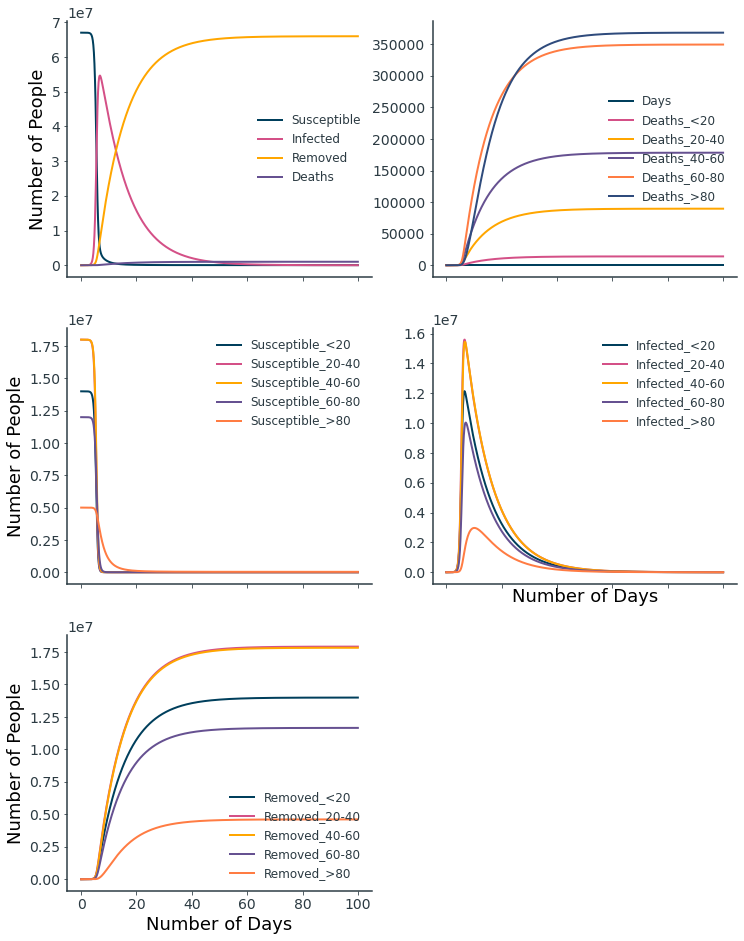

In [9]:
labels = ["<20", "20-40", "40-60", "60-80", ">80"]
S0 = [14000000, 18000000, 18000000, 12000000, 5000000]
I0 = [14, 18, 18, 12, 5]
R0 = [0, 0, 0, 0, 0]
beta = np.array(
    [
        [1.4, 0.875, 0.56, 0.35, 0.035],
        [0.875, 1.05, 0.77, 0.49, 0.07],
        [0.56, 0.77, 0.875, 0.63, 0.105],
        [0.35, 0.49, 0.63, 0.7, 0.14],
        [0.035, 0.07, 0.105, 0.14, 0.175],
    ]
)
gamma = [0.1, 0.1, 0.1, 0.1, 0.1]
omega = [0.0001, 0.0005, 0.001, 0.003, 0.008]
N = np.array(S0) + np.array(I0) + np.array(R0)

sim = AgeStructuredSIRD(labels, beta, gamma, omega, S0, I0, R0)
df, fig = sim.run(100, 0.1)
fig

In [10]:
end_deaths = df.iloc[-1][["Deaths"] + [f"Deaths_{l}" for l in labels]].astype(int)
end_suscep = df.iloc[-1][["Susceptible"] + [f"Susceptible_{l}" for l in labels]].astype(int)
total = np.array([sum(N)] + list(N))
end_infect = total - end_suscep
fatality_rates = pd.Series(end_deaths.values / end_infect.values, index=end_deaths.index)
for g, f, d, i, t in zip(end_deaths.index, fatality_rates, end_deaths, end_infect, total):
    print(f"{g:12}: {f*100:.2f}% fatality rate - {d:7,} deaths - {i:10,}/{t:10,} infected")

Deaths      : 1.49% fatality rate - 999,543 deaths - 66,972,588/67,000,067 infected
Deaths_<20  : 0.10% fatality rate -  13,984 deaths - 14,000,014/14,000,014 infected
Deaths_20-40: 0.50% fatality rate -  89,545 deaths - 18,000,018/18,000,018 infected
Deaths_40-60: 0.99% fatality rate - 178,205 deaths - 18,000,018/18,000,018 infected
Deaths_60-80: 2.91% fatality rate - 349,494 deaths - 12,000,012/12,000,012 infected
Deaths_>80  : 7.41% fatality rate - 368,311 deaths -  4,972,526/ 5,000,005 infected


## AgeStructuredSIRVD